Leyendo Datos...
Hecho
Computando proceso gaussiano...
Realizando ajuste del proceso gaussiano...
Computando derivadas y muestras...
Realizando gráficos...
Computando picos...
Finalizing plot


C:\Users\franc\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


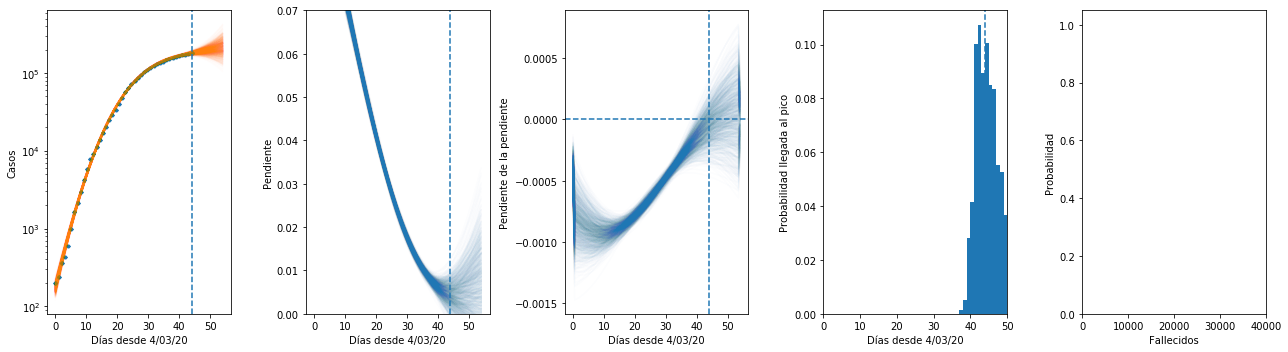

<Figure size 432x288 with 0 Axes>

Leyendo Datos...
Hecho
Computando proceso gaussiano...
Realizando ajuste del proceso gaussiano...
Computando derivadas y muestras...
Realizando gráficos...
Computando picos...


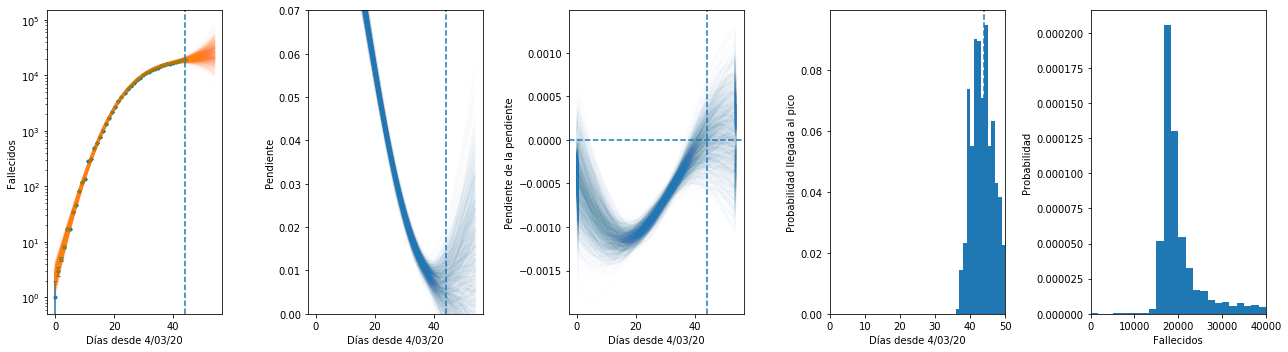

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct
from IPython.display import display


from datetime import date
from datetime import datetime, timedelta

def calculate(which, ax):
    print("Leyendo Datos...")
    if (which == 0):
        tmp = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv').values
        label = 'Fallecidos'
        left = 3
    else:
        tmp = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv').values
        label = 'Casos'
        left = 8

    print("Hecho")
    #print(type(tmp))
    #print("=================tmp (datos brutos)=====================")
    #print(tmp)
    tmp = tmp[-1,left:].astype('float') # Devuelve la última fila (-1) y todas las columnas excepto las 8 primeras (left=8)
    y = tmp
   #print("=================y (datos recortados)=====================")
   #
   #print(y)
    n = len(y)
    dy = np.sqrt(y)
    #print(np.gradient(y,1,axis=0))
    
    #print(dy)

    logy = np.log(y)
    dlogy = dy / y

    x = np.atleast_2d(np.linspace(0,n,n)).T # T transpone la matriz
    #print(x)
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
    # kernel = DotProduct()

    print("Computando proceso gaussiano...")
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha=dlogy)
    print("Realizando ajuste del proceso gaussiano...")
    gp.fit(x, logy)

    print("Computando derivadas y muestras...")
    xnew = np.atleast_2d(np.linspace(0,n+10,200)).T
    logy_pred, sigma = gp.predict(xnew, return_std=True)
    logy_samples = gp.sample_y(xnew, 1000)
    y_samples = np.exp(logy_samples)
    dy1 = np.gradient(logy_samples, 1, axis=0)
    dy2 = np.gradient(dy1, 1, axis=0)

    print("Realizando gráficos...")
    ax[0].semilogy(x, y, '.', color='C0')
    ax[0].errorbar(x, y, linestyle='', yerr=dlogy, color='C0', capsize=2)
    ax[0].semilogy(xnew, y_samples, color='C1', alpha=0.01)
    ax[1].plot(xnew, dy1, color='C0', alpha=0.01)
    ax[1].axvline(n, linestyle='--')
    ax[2].plot(xnew, dy2, color='C0', alpha=0.01)
    ax[2].axhline(0.0, linestyle='--')
    ax[2].axvline(n, linestyle='--')

    for i in range(4):
        ax[i].set_xlabel('Días desde 4/03/20')
    ax[0].axvline(n, linestyle='--')
    ax[0].set_ylabel(f'{label}')
    ax[1].set_ylabel('Pendiente')
    ax[1].set_ylim([0,0.07])
    ax[2].set_ylabel('Pendiente de la pendiente')

    print("Computando picos...")
    xnew = np.atleast_2d(np.linspace(0,n+40,300)).T
    logy_samples = gp.sample_y(xnew, 2000)
    dy1 = np.gradient(logy_samples, 1, axis=0)
    zero = xnew[np.argmin(np.abs(dy1),axis=0)]
    ax[3].hist(zero, bins=np.arange(n+20), density=True)
    ax[3].axvline(n, linestyle='--')
    ax[3].set_xlim([0, 50])
    ax[3].set_ylabel('Probabilidad llegada al pico')

    tmp = np.argmin(np.abs(dy1), axis=0)
    y_samples = np.exp(logy_samples)
    maxim = np.zeros(2000)
    for i in range(2000):
        maxim[i] = y_samples[tmp[i], i]

    ax[4].hist(maxim, bins=30, density=True, range=[0,50000])
    ax[4].set_xlabel('Fallecidos')
    ax[4].set_ylabel('Probabilidad')
    ax[4].set_xlim([0,40000])

if (__name__ == '__main__'):
    f, ax = pl.subplots(nrows=1, ncols=5, figsize=(18,5))

    #calculate(0, ax[:])
    calculate(1, ax[:])

    print("Finalizing plot")
    pl.tight_layout()
    pl.show()
    pl.savefig('coronavirus.png')
    pl.show()
    
    f, ax = pl.subplots(nrows=1, ncols=5, figsize=(18,5))
    calculate(0,ax[:])
    #print("Finalizing plot")
    pl.tight_layout()
    pl.show()
    pl.savefig('coronavirus2.jpg')
    pl.show()
    
    


POPT:  [ 1.93376888e+05  2.72375499e+01  1.61083364e-01 -4.10959127e+03]


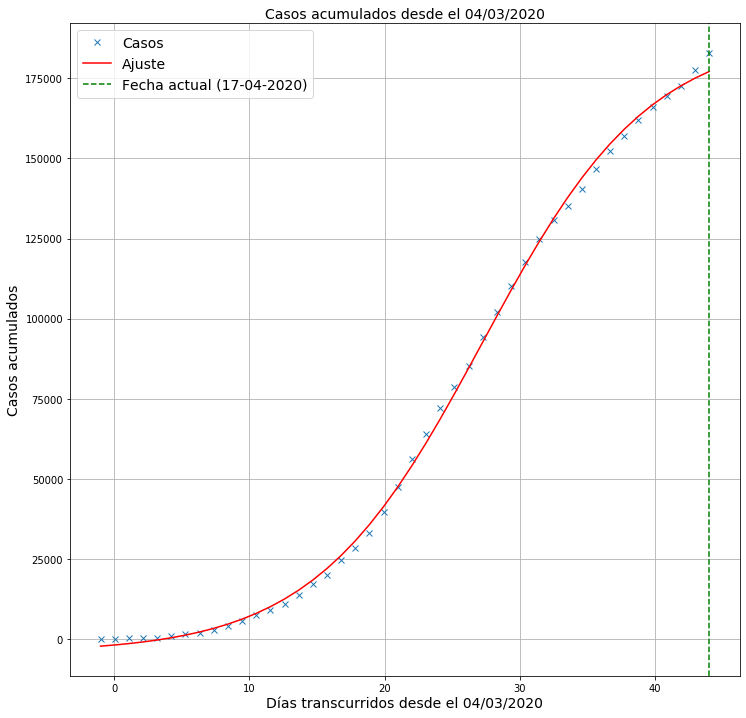

In [37]:
import numpy as np
import pylab
from datetime import date
from datetime import datetime, timedelta
from scipy.optimize import curve_fit

# def sigmoid(x, a, b):
#      y = 1 / (1 + np.exp(-b*(x-a)))
#      #return y
#      #y = 1. / (1. + np.exp(-a*(x-b)))
#      print("A:",a, "B ", b, "X ", x, "Y ", y)
#      return y
#      #return 1.0 / (1.0 + np.exp(-a*(x-b)))
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
tmp = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv').values
ydata = tmp[-1,8:].astype('float')
n = len(ydata)
x = np.linspace(-1,n, n)

# print("ydata: ",ydata)

xdata2 = np.linspace(-1,n, n)#xdata[0]
# print("xdata: ",xdata2)
p0=[max(ydata), np.median(x),1 ,min(ydata)]
popt, pcov = curve_fit(sigmoid, x, ydata, p0, method="dogbox")
print("POPT: ",popt)
#

# print("x linspace: ", x)
y = sigmoid(x, *popt)
# print("sigmoid y: ",y)
#

diferencia = abs(date.today()-date(2020,3,4))

hoy = date.today().strftime("%d-%m-%Y")
pl.figure(figsize=(12, 12))


pl.plot(xdata2, ydata, 'x', label='Casos' )
pl.plot(x,y, label='Ajuste', color="red")
pl.xlabel('Días transcurridos desde el 04/03/2020', fontsize=14)
pl.ylabel('Casos acumulados',  fontsize=14)
pl.axvline(x=diferencia.days, color="green", linestyle='--', label='Fecha actual ('+hoy+')')
#pylab.ylim(0, 1.05)
pl.legend(loc='best', fontsize=14)
pl.title('Casos acumulados desde el 04/03/2020', fontsize=14)
pl.grid(True)
pl.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

from IPython.display import display

from datetime import date
from datetime import datetime, timedelta

fecha,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,...,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16
casos,NaN,39.0,128.0,65.0,159.0,410.0,623.0,506.0,822.0,1259.0,...,5478.0,6180.0,5756.0,4576.0,4830.0,4167.0,3477.0,3045.0,5092.0,5183.0
altas,NaN,NaN,NaN,NaN,NaN,NaN,112.0,48.0,6.0,0.0,...,2771.0,4813.0,4144.0,3503.0,3441.0,3282.0,2336.0,2777.0,3349.0,3944.0


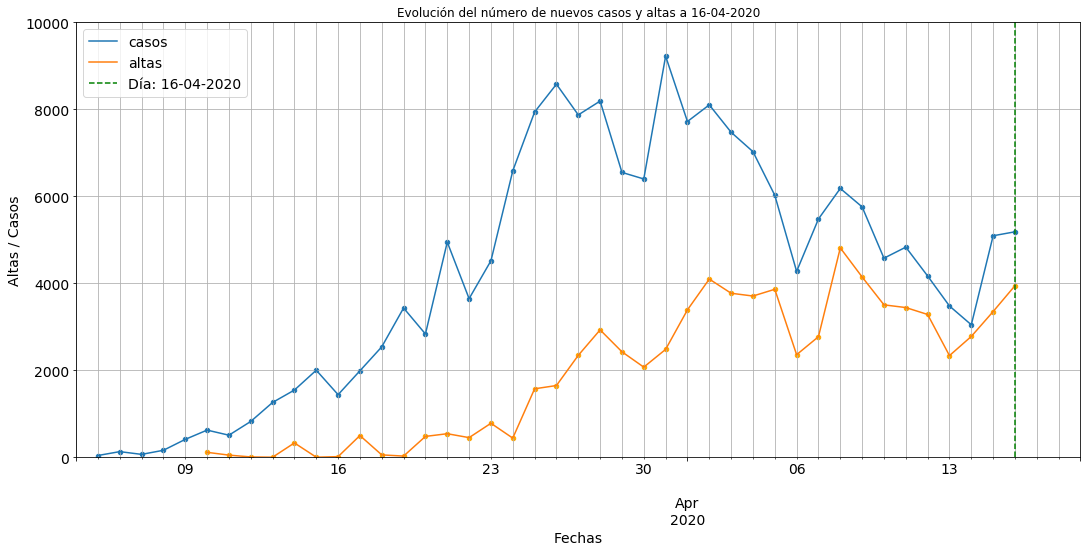

In [40]:
tmp2 = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/nacional_covid19.csv', infer_datetime_format=True)
datos = tmp2.loc[:,['fecha', 'casos', 'altas']]
datos['fecha'] = pd.to_datetime(datos['fecha'])
datos = datos.set_index(['fecha'])
datos =  datos.loc['2020-03-04':date.today()-timedelta(days=1),: ]
datos = datos.diff(axis=0)
display(datos.T)

hoy = (date.today()-timedelta(days=1)).strftime("%d-%m-%Y")
fecha_ultimo_dato=(date.today()-timedelta(days=1)).strftime("%d-%m-%Y")

ax = pl.gca()

datos.plot(title='Evolución del número de nuevos casos y altas a '+fecha_ultimo_dato, figsize=(18,8), fontsize=14, xlim=('2020-03-04',date.today()+timedelta(days=2)), ylim=(0, 10000), ax=ax)
datos.reset_index(inplace=True)

datos.plot(kind='scatter',x='fecha', y='casos', ax=ax)
datos.plot(kind='scatter',x='fecha', y='altas', color='orange', ax=ax)
pl.axvline(x=date.today()-timedelta(days=1), color="green", linestyle='--', label='Día: '+hoy)
pl.xlabel('Fechas', fontsize=14)
pl.ylabel("Altas / Casos", fontsize=14)
pl.grid(True, axis='both', which='both')

pl.legend(loc='best', fontsize=14)

pl.savefig("evolucion_casos_altas_"+hoy+".png")


In [142]:
print(date.today()- timedelta(days=1))

2020-04-14


In [40]:
help(pl.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc='center', pad=None, **kwargs)
    Set a title for the axes.
    
    Set one of the three available axes titles. The available titles
    are positioned above the axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    pad : float
        The offset of the title from the top of the axes, in points.
        Default is ``None`` to use rcParams['axes.titlepad'].
